# Paquetes necesarios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ejercicio 1

## a) Obtener, usando algún programa estadístico, las medidas de centralización y dispersión para cada uno de los dos grupos de control de la variable (grupo 1 y grupo 2) que mide la presión sistólica antes de la toma del medicamento e indica si la media en cada uno de estos grupos puede considerarse representativa a partir de los datos obtenidos. 

In [3]:
# Cargamos los datos desde el archivo Excel
BBDD = pd.read_excel("HIPERTENSION.xlsx") 
print(BBDD)

    Grupo  Edad  Presion sistólica antes  Presión sistólica después  \
0       1    30                      126                        118   
1       1    25                      114                        110   
2       1    27                      110                        110   
3       1    34                      108                        105   
4       1    35                      131                        132   
..    ...   ...                      ...                        ...   
95      2    54                      117                        100   
96      2    50                      148                        141   
97      2    54                      121                        115   
98      2    52                      154                        155   
99      2    46                      120                        116   

    Colesterol total  
0                191  
1                181  
2                175  
3                173  
4                200  
..       

In [4]:
# Dividir la base de datos en dos grupos según la variable "Grupo"
Grupo_1 = BBDD[BBDD["Grupo"] == 1]
Grupo_2 = BBDD[BBDD["Grupo"] == 2]

# Calcular los estadísticos principales para cada grupo
summary_stats_1 = Grupo_1.describe()
summary_stats_2 = Grupo_2.describe()

In [5]:
summary_stats_1

,Grupo,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
count,40.0,40.000000,40.000000,40.0000,40.000000
mean,1.0,26.550000,123.425000,119.9000,187.275000
std,0.0,5.232786,9.026705,9.3337,11.668471
min,1.0,18.000000,105.000000,103.0000,164.000000
25%,1.0,22.000000,117.500000,113.7500,179.750000
50%,1.0,27.000000,124.500000,120.0000,185.000000
75%,1.0,30.250000,129.000000,125.5000,193.250000
max,1.0,35.000000,142.000000,142.0000,214.000000


In [6]:
# Calculamos el rango total y el rango intercuartílico para el Grupo 1
Rango_1 = summary_stats_1.loc['max', 'Presion sistólica antes'] - summary_stats_1.loc['min', 'Presion sistólica antes']
RIC_1 = summary_stats_1.loc['75%', 'Presion sistólica antes'] - summary_stats_1.loc['25%', 'Presion sistólica antes']
print(f'Rango del Grupo 1: {Rango_1}')
print(f'Rango Intercuartílico del Grupo 1: {RIC_1}')

Rango del Grupo 1: 37.0
Rango Intercuartílico del Grupo 1: 11.5


Al analizar las estadísticas descriptivas del grupo 1, se observa que la media (123.425 mmHg) y la mediana (124.5 mmHg) presentan valores muy similares, lo que sugiere que los datos se encuentran centralizados. Ya que la presión sistólica es una variable cuantitativa continua, la moda no se considera una medida representativa. No se identifican valores extremos significativos, ya que el mínimo es de 105 mmHg y el máximo de 142 mmHg. 

En cuanto a la dispersión, la desviación típica (9.03 mmHg) indica una variabilidad moderada respecto a la media. Estos resultados proporcionan una primera aproximación a la distribución de los datos, aunque completaremos el análisis con representaciones gráficas o pruebas adicionales para obtener conclusiones más precisas.

In [7]:
summary_stats_2

,Grupo,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
count,60.0,60.000000,60.000000,60.000000,60.00000
mean,2.0,57.200000,127.483333,123.450000,202.20000
std,0.0,12.735643,13.888773,17.395134,32.38738
min,2.0,36.000000,96.000000,77.000000,150.00000
25%,2.0,49.000000,118.750000,115.000000,179.75000
50%,2.0,56.000000,126.000000,121.000000,195.00000
75%,2.0,66.500000,138.250000,135.000000,215.25000
max,2.0,86.000000,154.000000,161.000000,298.00000


In [8]:
# Calculamos el rango total y el rango intercuartílico para el Grupo 2
Rango_2 = summary_stats_2.loc['max', 'Presion sistólica antes'] - summary_stats_2.loc['min', 'Presion sistólica antes']
RIC_2 = summary_stats_2.loc['75%', 'Presion sistólica antes'] - summary_stats_2.loc['25%', 'Presion sistólica antes']
print(f'Rango del Grupo 2: {Rango_2}')
print(f'Rango Intercuartílico del Grupo 2: {RIC_2}')

Rango del Grupo 2: 58.0
Rango Intercuartílico del Grupo 2: 19.5


En el grupo 2 se observa que la media (127.48 mmHg) y la mediana (126 mmHg) difieren ligeramente más que en el grupo 1, lo que sugiere una distribución algo menos simétrica. 

Además, los datos presentan una mayor dispersión, con valores comprendidos entre un mínimo de 96 mmHg y un máximo de 154 mmHg. Tanto el rango total como el rango intercuartílico son superiores a los del grupo 1, lo que indica que la presión sistólica en este grupo se encuentra más dispersa y presenta una variabilidad más elevada. La desviación típica (13.89 mmHg) también resulta superior a la del grupo 1, lo que indica una variabilidad más elevada en las mediciones de este grupo. 

Para analizar si la media es representativa, calcularemos el coeficiente de variación (se suele considerar que la media es representativa si el coeficiente de variación es menor que 0.3). 

$$
CV = \frac{s}{\bar{x}}
$$

In [9]:
# Cálculo del Coeficiente de Variación para ambos grupos
CV_1 = (Grupo_1['Presion sistólica antes'].std() / Grupo_1['Presion sistólica antes'].mean())
CV_2 = (Grupo_2['Presion sistólica antes'].std() / Grupo_2['Presion sistólica antes'].mean())

print(f'Coeficiente de Variación del Grupo 1: {CV_1:.2f}')
print(f'Coeficiente de Variación del Grupo 2: {CV_2:.2f}')

Coeficiente de Variación del Grupo 1: 0.07
Coeficiente de Variación del Grupo 2: 0.11


Como ambos coeficientes de variación son menores que 0.3 podemos considerar que ambas medias son representativas.

## b) Estudiar la simetría y la curtosis del nivel de presión sistólica en los pacientes del segundo grupo para cada una de las mediciones de la hipertensión que aparecen en la tabla interpretando los valores obtenidos. 

Como punto de partida, se observa que ambos grupos presentan valores de media y mediana bastante próximos, lo que sugiere una distribución relativamente simétrica en general.

En el grupo 2, la presión sistólica antes de la toma del medicamento presenta una media de 127.48 mmHg y una mediana de 126 mmHg. Dado que la media es ligeramente mayor que la mediana, puede inferirse una leve asimetría positiva en la distribución.

Para confirmar nuestras hipótesis iniciales, calcularemos las medidas de asimetría.

In [10]:
# Asimetría del Grupo 2
skew_2_ant = Grupo_2['Presion sistólica antes'].skew()
skew_2_des = Grupo_2['Presión sistólica después'].skew()
print(f'Asimetría del Grupo 2 antes: {skew_2_ant:.2f}')
print(f'Asimetría del Grupo 2 después: {skew_2_des:.2f}')

Asimetría del Grupo 2 antes: -0.14
Asimetría del Grupo 2 después: -0.19


Según los coeficientes de asimetría obtenidos, ambos grupos presentan una ligera asimetría negativa, dado que los valores son menores que cero. Esto indica que las distribuciones tienden levemente hacia la izquierda. Sin embargo, al ser los coeficientes próximos a cero, puede considerarse que los datos presentan una distribución aproximadamente simétrica.

Para comprobar visualmente esta tendencia, se representarán los resultados mediante un diagrama de barras que facilite la comparación entre ambos grupos.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2828\3297935564.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  barras_ant = sns.histplot(Grupo_2['Presion sistólica antes'], kde=True, palette='pastel', bins=10)


Text(0.5, 0, 'Presión Sistólica Antes (mmHg)')

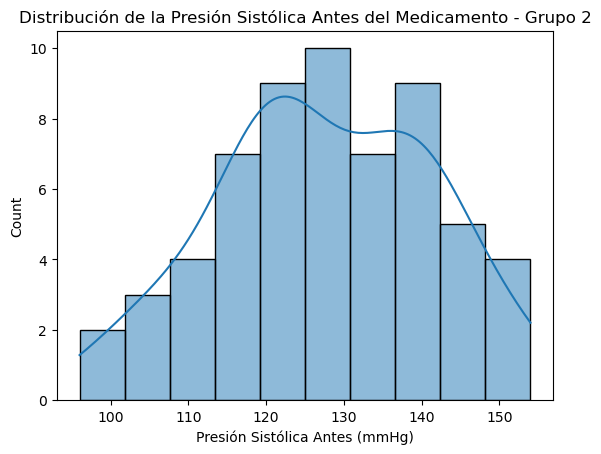

In [11]:
# Gráficas de barras para el Grupo 2 antes del medicamento
barras_ant = sns.histplot(Grupo_2['Presion sistólica antes'], kde=True, palette='pastel', bins=10)
plt.title('Distribución de la Presión Sistólica Antes del Medicamento - Grupo 2')
plt.xlabel('Presión Sistólica Antes (mmHg)') 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2828\4109338836.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  barras_des = sns.histplot(Grupo_2['Presión sistólica después'], kde=True, palette='pastel', bins=10)


Text(0.5, 0, 'Presión Sistólica Después (mmHg)')

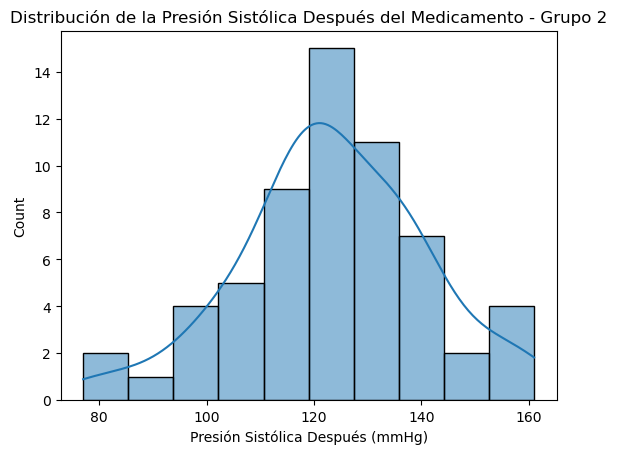

In [12]:
# Gráficas de barras para el Grupo 2 antes del medicamento
barras_des = sns.histplot(Grupo_2['Presión sistólica después'], kde=True, palette='pastel', bins=10)
plt.title('Distribución de la Presión Sistólica Después del Medicamento - Grupo 2')
plt.xlabel('Presión Sistólica Después (mmHg)') 

Se observa que la distribución de los valores de presión sistólica antes de la toma del medicamento es más centralizada que después de la toma. Esta diferencia podría deberse a que el efecto del medicamento varía entre individuos, generando respuestas distintas. En algunos casos, el fármaco puede producir cambios más pronunciados o incluso efectos adversos, lo que explicaría el aumento en la dispersión de los valores después de la toma del medicamento.

Ahora estudiaremos la concentración de dichos valores alrededor de la media con el análisis de la curtosis de los datos.

In [13]:
# Curtosis del Grupo 2
kurt_2_ant = Grupo_2['Presion sistólica antes'].kurtosis()
kurt_2_des = Grupo_2['Presión sistólica después'].kurtosis()
print(f'Curtosis del Grupo 2 antes: {kurt_2_ant:.2f}')
print(f'Curtosis del Grupo 2 después: {kurt_2_des:.2f}')    

Curtosis del Grupo 2 antes: -0.60
Curtosis del Grupo 2 después: 0.37


Antes de la toma del medicamento, el coeficiente de curtosis presentaba un valor negativo, lo que indica una distribución platicúrtica, caracterizada por una forma más aplanada y con valores más concentrados alrededor de la media. En cambio, después de la administración del medicamento, el coeficiente se vuelve positivo, reflejando una distribución leptocúrtica, más apuntada y con colas más largas.

Este cambio sugiere que, tras la toma del medicamento, los valores de presión sistólica tienden a alejarse más de la media, aumentando la presencia de observaciones extremas. Esto es coherente con los resultados previos, que mostraban una mayor dispersión y menor simetría en las mediciones posteriores. 

## c) Indicar para cada una de las variables relacionadas con la medición de la presión sistólica que aparecen en el fichero el valor de los cuartiles y su significado y obtener el box- plot ( diagrama de cajas) correspondiente. Estudiar la presencia de valores atípicos.

In [14]:
# Cuartiles e interpretación de la presión sistólica antes y después para el grupo 1
cuartiles_1_ant = Grupo_1['Presion sistólica antes'].quantile([0.25, 0.5, 0.75])
cuartiles_1_des = Grupo_1['Presión sistólica después'].quantile([0.25, 0.5, 0.75])
print(f'Cuartiles del Grupo 1 antes:\n{cuartiles_1_ant}')
print(f'Cuartiles del Grupo 1 después:\n{cuartiles_1_des}')

Cuartiles del Grupo 1 antes:
0.25    117.5
0.50    124.5
0.75    129.0
Name: Presion sistólica antes, dtype: float64
Cuartiles del Grupo 1 después:
0.25    113.75
0.50    120.00
0.75    125.50
Name: Presión sistólica después, dtype: float64


En el grupo 1, antes de la toma del medicamento, el 25% de los individuos presentaba una presión sistólica de hasta 117,5 mmHg, el 50% (la mediana) alcanzaba 124,5 mmHg, y el 75% registraba valores de hasta 129 mmHg.

Por otro lado, después de la toma del medicamento, el 25% de los individuos no superaba los 113,75 mmHg, lo que sugiere un posible efecto reductor del tratamiento. La mediana se situó en 120 mmHg, y el 75% de los participantes presentaba presiones sistólicas inferiores a 125,5 mmHg.

En conjunto, la comparación de los cuartiles antes y después de la toma del medicamento muestra una reducción general en los valores de presión sistólica y una distribución más concentrada, lo que sugiere que el tratamiento no solo disminuyó la presión arterial promedio, sino que también redujo la variación entre los individuos, evidenciando un efecto potencialmente eficaz del medicamento.

In [15]:
# Cuartiles e interpretación de la presión sistólica antes y después para el grupo 2
cuartiles_2_ant = Grupo_2['Presion sistólica antes'].quantile([0.25, 0.5, 0.75])
cuartiles_2_des = Grupo_2['Presión sistólica después'].quantile([0.25, 0.5, 0.75])
print(f'Cuartiles del Grupo 2 antes:\n{cuartiles_2_ant}')
print(f'Cuartiles del Grupo 2 después:\n{cuartiles_2_des}')

Cuartiles del Grupo 2 antes:
0.25    118.75
0.50    126.00
0.75    138.25
Name: Presion sistólica antes, dtype: float64
Cuartiles del Grupo 2 después:
0.25    115.0
0.50    121.0
0.75    135.0
Name: Presión sistólica después, dtype: float64


En el grupo 2, los cuartiles también reflejan una disminución general en los valores de presión sistólica tras la toma del medicamento. Antes de la administración, el 25% de los individuos presentaba presiones sistólicas inferiores a 118,75 mmHg, la mediana alcanzaba los 126 mmHg, y el 75% registraba valores por debajo de 138,25 mmHg. Vemos que los datos del grupo 2 presentan una distribución más dispersa que los del grupo 1.

Después de la toma del medicamento, el 25% de los individuos tenía valores inferiores a 115 mmHg, el 50% (mediana) alcanzaba los 121 mmHg, y el 75% se situaba por debajo de 135 mmHg.

Esta evolución sugiere una reducción moderada de la presión sistólica y una ligera concentración de los valores en torno a la mediana, lo que indica que el efecto del medicamento también fue perceptible en este grupo, aunque con una mayor dispersión general que en el grupo 1.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2828\673798026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot_antes = sns.boxplot(x='Grupo', y='Presion sistólica antes', data=BBDD, palette='pastel')


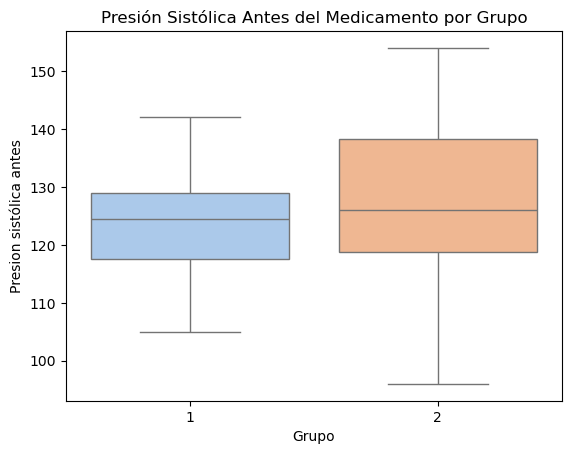

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2828\673798026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot_despues = sns.boxplot(x='Grupo', y='Presión sistólica después', data=BBDD, palette='pastel')


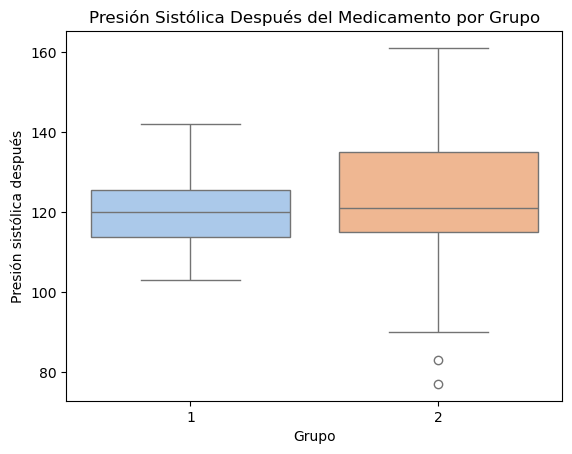

In [16]:
# Representación gráfica de los datos mediante un diagrama de caja
boxplot_antes = sns.boxplot(x='Grupo', y='Presion sistólica antes', data=BBDD, palette='pastel')
plt.title('Presión Sistólica Antes del Medicamento por Grupo')
plt.show()

boxplot_despues = sns.boxplot(x='Grupo', y='Presión sistólica después', data=BBDD, palette='pastel')
plt.title('Presión Sistólica Después del Medicamento por Grupo')
plt.show()

Al observar los dos gráficos generados, se aprecia claramente que la administración del medicamento produjo una reducción general en los niveles de presión sistólica. No obstante, el efecto parece variar según el grupo analizado, lo cual resulta coherente si consideramos que el grupo 1 está compuesto por individuos de 35 años o menos, mientras que el grupo 2 incluye a personas mayores de 35 años.

Es habitual que los individuos de mayor edad presenten otras condiciones de salud que puedan interferir en la eficacia del tratamiento, lo que explicaría la mayor dispersión observada en el grupo 2 y la presencia de valores atípicos. En el diagrama de caja correspondiente, se identifican dos valores extremos en el grupo 2 tras la toma del medicamento. Para confirmar esta observación, se procederá al cálculo detallado de los valores atípicos en ambos grupos, antes y después de la administración.

$$
IQR = Q_3 - Q_1
$$

$$
L_{\text{inferior}} = Q_1 - 1.5 \times IQR
$$

$$
L_{\text{superior}} = Q_3 + 1.5 \times IQR
$$
Donde:
- $Q_1$ es el primer cuartil (percentil 25),
- $Q_3$ es el tercer cuartil (percentil 75),
- $IQR$ representa el rango intercuartílico o la amplitud del 50% central de los datos,
- $L_{\text{inferior}}$ y $L_{\text{superior}}$ son los límites que determinan la presencia de valores atípicos:  cualquier valor $x$ tal que $x < L_{\text{inferior}}$ o $x > L_{\text{superior}}$ se considera outlier.

In [ ]:
# Función para calcular outliers usando el método del IQR
def calcular_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[variable] < limite_inferior) | (df[variable] > limite_superior)]
    
    print(f"\n--- {variable.upper()} ---")
    print(f"Límite inferior: {limite_inferior:.2f}")
    print(f"Límite superior: {limite_superior:.2f}")
    print(f"Valores atípicos encontrados: {len(outliers)}")
    print(outliers)
    
    return outliers

In [38]:
# Outliers para la presión sistólica antes y después del medicamento en ambos grupos
outliers_1_ant = calcular_outliers(Grupo_1, 'Presion sistólica antes')
outliers_1_des = calcular_outliers(Grupo_1, 'Presión sistólica después')
outliers_2_ant = calcular_outliers(Grupo_2, 'Presion sistólica antes')
outliers_2_des = calcular_outliers(Grupo_2, 'Presión sistólica después')


--- PRESION SISTÓLICA ANTES ---
Límite inferior: 100.25
Límite superior: 146.25
Valores atípicos encontrados: 0
Empty DataFrame
Columns: [Grupo, Edad, Presion sistólica antes, Presión sistólica después, Colesterol total]
Index: []

--- PRESIÓN SISTÓLICA DESPUÉS ---
Límite inferior: 96.12
Límite superior: 143.12
Valores atípicos encontrados: 0
Empty DataFrame
Columns: [Grupo, Edad, Presion sistólica antes, Presión sistólica después, Colesterol total]
Index: []

--- PRESION SISTÓLICA ANTES ---
Límite inferior: 89.50
Límite superior: 167.50
Valores atípicos encontrados: 0
Empty DataFrame
Columns: [Grupo, Edad, Presion sistólica antes, Presión sistólica después, Colesterol total]
Index: []

--- PRESIÓN SISTÓLICA DESPUÉS ---
Límite inferior: 85.00
Límite superior: 165.00
Valores atípicos encontrados: 2
    Grupo  Edad  Presion sistólica antes  Presión sistólica después  \
65      2    81                      105                         83   
80      2    45                      100        

Tal como se anticipaba, se identificaron dos valores extremos correspondientes al grupo 2 (personas de mayor edad) tras la administración del medicamento. Estos casos podrían indicar que el fármaco tuvo un efecto especialmente pronunciado en dichos individuos o bien que no presentaban niveles elevados de presión sistólica antes del tratamiento (con valores de 105 mmHg y 100 mmHg, respectivamente).

En este sentido, es posible que estos participantes no cumplieran plenamente los criterios iniciales de selección, lo que podría afectar la representatividad de la muestra y explicar la presencia de estos valores atípicos.

## d) Estudiar la normalidad de los datos de las variables relacionadas con la medición de la presión sistólica.

Para estudiar la normalidad de los datos, analizaremos su distribución de manera gráfica y analítica, mediante el estudio de la simetría y de la curtosis.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2828\2877994913.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  barras_1_ant = sns.histplot(Grupo_1['Presion sistólica antes'], kde=True, palette='pastel', bins=10)


Text(0.5, 0, 'Presión Sistólica Antes (mmHg)')

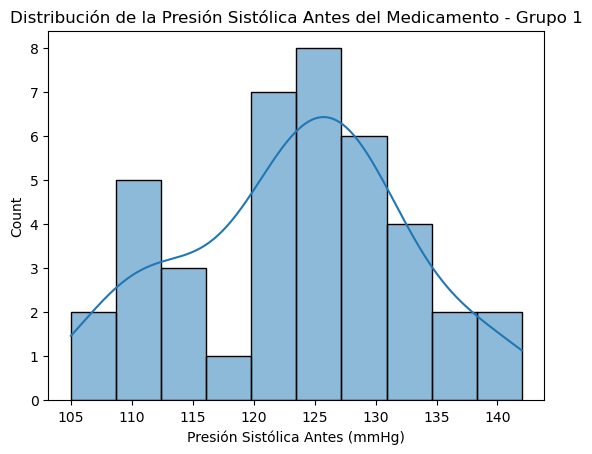

In [18]:
# Gráficas de barras para el Grupo 1 antes del medicamento
barras_1_ant = sns.histplot(Grupo_1['Presion sistólica antes'], kde=True, palette='pastel', bins=10)
plt.title('Distribución de la Presión Sistólica Antes del Medicamento - Grupo 1')
plt.xlabel('Presión Sistólica Antes (mmHg)') 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2828\1871167130.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  barras_1_des = sns.histplot(Grupo_1['Presión sistólica después'], kde=True, palette='pastel', bins=10)


Text(0.5, 0, 'Presión Sistólica Después (mmHg)')

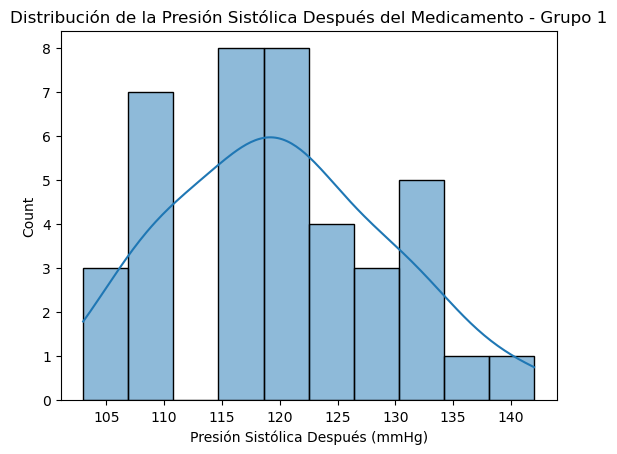

In [19]:
# Gráficas de barras para el Grupo 1 después del medicamento
barras_1_des = sns.histplot(Grupo_1['Presión sistólica después'], kde=True, palette='pastel', bins=10)
plt.title('Distribución de la Presión Sistólica Después del Medicamento - Grupo 1')
plt.xlabel('Presión Sistólica Después (mmHg)')

Teniendo en cuenta que las medianas son de 124,5 mmHg y 120 mmHg, respectivamente, se observa que la distribución de los datos no se concentra en torno a la mediana, por lo que no puede considerarse completamente simétrica en ninguno de los casos. Además, los valores muestran una amplitud considerable, lo que sugiere una dispersión notable dentro de cada grupo.

Con el fin de confirmar esta observación de manera más rigurosa, se procederá al análisis analítico de la asimetría y la curtosis, que permitirá evaluar con mayor precisión la forma de las distribuciones.

In [20]:
# Asimetría del Grupo 1
skew_1_ant = Grupo_1['Presion sistólica antes'].skew()
skew_1_des = Grupo_1['Presión sistólica después'].skew()
print(f'Asimetría del Grupo 1 antes: {skew_1_ant:.2f}')
print(f'Asimetría del Grupo 1 después: {skew_1_des:.2f}')

Asimetría del Grupo 1 antes: -0.14
Asimetría del Grupo 1 después: 0.30


In [21]:
# Curtosis del Grupo 1
kurt_1_ant = Grupo_1['Presion sistólica antes'].kurtosis()
kurt_1_des = Grupo_1['Presión sistólica después'].kurtosis()
print(f'Curtosis del Grupo 1 antes: {kurt_1_ant:.2f}')
print(f'Curtosis del Grupo 1 después: {kurt_1_des:.2f}') 

Curtosis del Grupo 1 antes: -0.46
Curtosis del Grupo 1 después: -0.40


Los valores de asimetría y curtosis del Grupo 1 se sitúan muy próximos a cero, lo que sugiere que las distribuciones de la presión sistólica (tanto antes como después de la toma del medicamento) son aproximadamente normales.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2828\3524770324.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  barras_2_ant = sns.histplot(Grupo_2['Presion sistólica antes'], kde=True, palette='pastel', bins=10)


Text(0.5, 0, 'Presión Sistólica Antes (mmHg)')

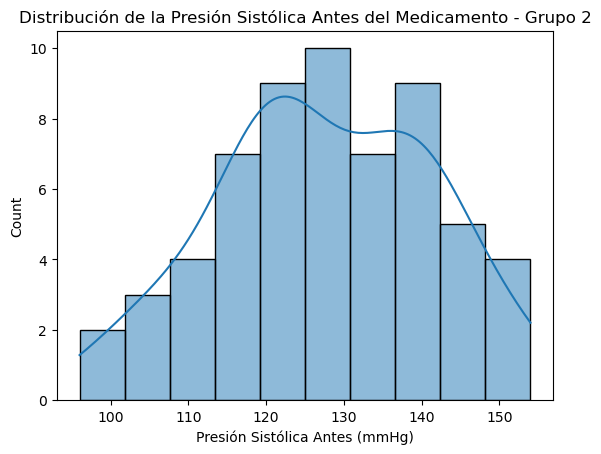

In [22]:
# Gráficas de barras para el Grupo 2 antes del medicamento
barras_2_ant = sns.histplot(Grupo_2['Presion sistólica antes'], kde=True, palette='pastel', bins=10)
plt.title('Distribución de la Presión Sistólica Antes del Medicamento - Grupo 2')
plt.xlabel('Presión Sistólica Antes (mmHg)') 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2828\1075985426.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  barras_2_des = sns.histplot(Grupo_2['Presión sistólica después'], kde=True, palette='pastel', bins=10)


Text(0.5, 0, 'Presión Sistólica Después (mmHg)')

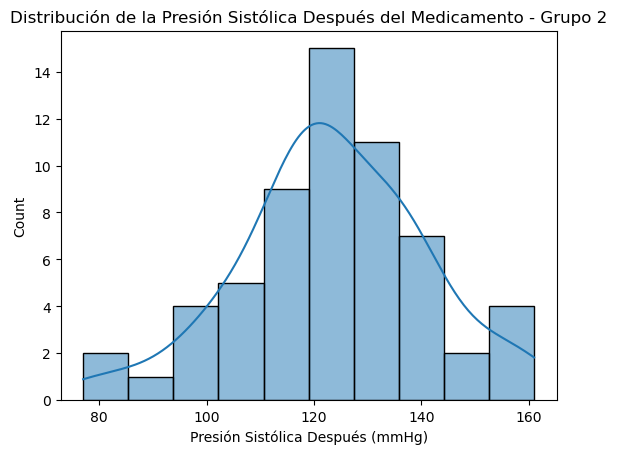

In [23]:
# Gráficas de barras para el Grupo 2 después del medicamento
barras_2_des = sns.histplot(Grupo_2['Presión sistólica después'], kde=True, palette='pastel', bins=10)
plt.title('Distribución de la Presión Sistólica Después del Medicamento - Grupo 2')
plt.xlabel('Presión Sistólica Después (mmHg)') 

En este caso, la gráfica que representa la distribución de los datos antes de la administración del medicamento muestra una asimetría más marcada y una forma ligeramente platicúrtica, es decir, más aplanada que la distribución normal. En cambio, tras la administración del medicamento, los resultados presentan una distribución más simétrica y con menor curtosis, lo que indica una concentración más homogénea de los valores alrededor de la media.

In [24]:
# Asimetría del Grupo 2 (previamente calculada)
print(f'Asimetría del Grupo 2 antes: {skew_2_ant:.2f}')
print(f'Asimetría del Grupo 2 después: {skew_2_des:.2f}')

Asimetría del Grupo 2 antes: -0.14
Asimetría del Grupo 2 después: -0.19


In [25]:
# Curtosis del Grupo 2 (previamente calculada)
print(f'Curtosis del Grupo 2 antes: {kurt_2_ant:.2f}')
print(f'Curtosis del Grupo 2 después: {kurt_2_des:.2f}')

Curtosis del Grupo 2 antes: -0.60
Curtosis del Grupo 2 después: 0.37


En el grupo 2, los coeficientes de asimetría se mantienen muy próximos a cero tanto antes como después del medicamento, lo que indica que las distribuciones son prácticamente simétricas. En cuanto a la curtosis, antes de la administración se observa una forma ligeramente platicúrtica, mientras que después del tratamiento se aproxima a una forma leptocúrtica.

Este cambio sugiere que, tras la toma del medicamento, los valores de presión sistólica tienden a concentrarse más alrededor de la media, reduciendo levemente la dispersión y mostrando una distribución más próxima a la normal.

En conjunto, ambos grupos presentan distribuciones que se aproximan a la normalidad, aunque el grupo 2 muestra una mayor tendencia a concentrar los valores tras el tratamiento, lo que podría reflejar un efecto más homogéneo del medicamento en este grupo.

# Ejercicio 2

Con los datos del fichero anterior, se quiere estudiar la relación existente 
entre la presión sistólica después de la toma del medicamento y el 
colesterol total del paciente en los pacientes jóvenes ( grupo 1) 

## a) Estudiar la relación lineal entre estas dos variables 

Primero representaremos los datos de forma gráfica con el objetivo de formular nuestras primeras hipótesis. Posteriormente, calcularemos la covarianza y el coeficiente de correlación para analizar la relación lineal entre el colesterol total y la presión sistólica después de la medición.

Text(0.5, 0, 'Colesterol Total (mg/dL)')

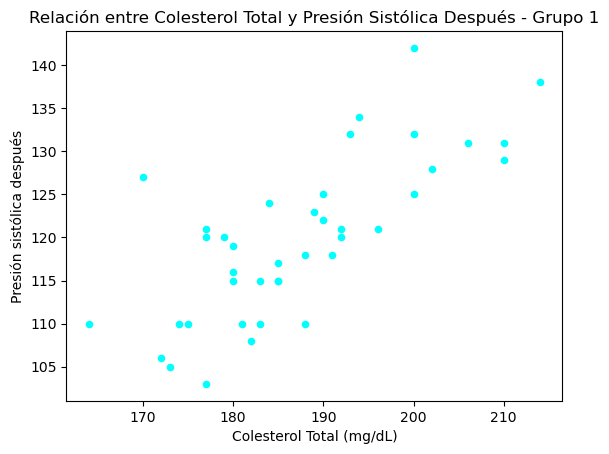

In [26]:
# Representación gráfica de la relación entre Colesterol Total y Presión Sistólica Después para el Grupo 1
x = Grupo_1['Colesterol total']
y = Grupo_1['Presión sistólica después']
mmHg_desp_colesterol = pd.DataFrame({'Colesterol total': x, 'Presión sistólica después': y})
mmHg_desp_colesterol.plot(kind='scatter', x='Colesterol total', y='Presión sistólica después', color='cyan')
plt.title('Relación entre Colesterol Total y Presión Sistólica Después - Grupo 1')
plt.xlabel('Colesterol Total (mg/dL)')

Al observar la gráfica, se aprecia que a medida que aumenta el colesterol, también lo hace la presión sistólica, por lo que podemos suponer que ambas variables mantienen una relación directamente proporcional. Para confirmarlo, lo comprobaremos de manera analítica también. 

In [27]:
# Cálculo de la covarianza y el coeficiente de correlación para el Grupo 1
covarianza_1_desp = np.cov(Grupo_1['Colesterol total'], Grupo_1['Presión sistólica después'])[0][1]
correlacion_1_desp = np.corrcoef(Grupo_1['Colesterol total'], Grupo_1['Presión sistólica después'])[0][1]
print(f'Covarianza del Grupo 1: {covarianza_1_desp:.2f}')
print(f'Coeficiente de correlación del Grupo 1: {correlacion_1_desp:.2f}')

Covarianza del Grupo 1: 81.52
Coeficiente de correlación del Grupo 1: 0.75


La covarianza presenta un valor positivo y considerablemente alto (81.52), lo que indica que ambas variables mantienen una relación directa: a medida que aumenta el colesterol, también lo hace la presión sistólica. Asimismo, el coeficiente de correlación obtenido (0.75) refleja una correlación positiva fuerte, lo que reafirma la hipótesis inicial.

## b) Obtener un modelo lineal que explica la presión sistólica del paciente joven a los 60 minutos de ingerir el medicamento en función de su colesterol total y realizar la estimación para un paciente del grupo 1 ( joven) cuyo colesterol total es 105 mg/Dl 


In [39]:
# Modelo de regresión lineal para el Grupo 1
beta_0_1 = sm.add_constant(Grupo_1['Colesterol total'])
presion_1_des = Grupo_1['Presión sistólica después']
model_1 = sm.OLS(presion_1_des, beta_0_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Presión sistólica después   R-squared:                       0.560
Model:                                   OLS   Adj. R-squared:                  0.549
Method:                        Least Squares   F-statistic:                     48.40
Date:                       Mon, 20 Oct 2025   Prob (F-statistic):           2.81e-08
Time:                               19:55:26   Log-Likelihood:                -129.17
No. Observations:                         40   AIC:                             262.3
Df Residuals:                             38   BIC:                             265.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.7778     16.146      0.482      0.633     -24.909      40.464
Colesterol total     0.5987      0.086      6.957      0.000       0.424       0.773
==============================================================================
Omnibus:                        5.512   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.226
Skew:                           0.746   Prob(JB):                        0.121
Kurtosis:                       3.555   Cond. No.                     3.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

En nuestro modelo, la constante representa el nivel estimado de presión sistólica de un paciente joven después de la toma del medicamento cuando su colesterol es igual a 0 mg/dL. Este resultado carece de una interpretación lógica, ya que ninguna persona presenta un nivel de colesterol nulo. Además, el coeficiente no resulta significativo a ningún nivel de significación, por lo que no tiene una interpretación práctica.

La pendiente, en cambio, indica que por cada 1 mg/dL adicional de colesterol, la presión sistólica aumenta en promedio 7.7778 mmHg. Este coeficiente sí es significativo a todos los niveles de significación habituales, lo que confirma la existencia de una relación lineal positiva entre ambas variables.

Para estimar la presión sistólica de un paciente joven con un colesterol de 105 mg/dL, sustituimos en la siguiente ecuación:
$$
\widehat{\text{Presión Sistólica Después}}_{Grupo\,1} = 7.7778 + 0.5987 \times \text{Colesterol Total}
$$

In [34]:
# Estimación de la presión sistólica para un paciente joven con colesterol de 105 mg/dL
print(f'El nivel de presión sistólica estimado para un paciente joven con un colesterol de 105 mg/dL es de {7.7778 + 0.5987 * 105:.2f} mmHg.')

El nivel de presión sistólica estimado para un paciente joven con un colesterol de 105 mg/dL es de 70.64 mmHg.


## c) ¿Qué tanto por ciento de la presión sistólica del paciente joven a los 60 minutos de ingerir el medicamento no queda explicado por el anterior modelo? ¿Cómo podrías mejorar el modelo? 


Para responder a esta pregunta, observamos el valor de R<sup>2</sup> del modelo, que indica que aproximadamente el 56% de la variabilidad en la presión sistólica del paciente joven después de la toma del medicamento es explicada por el nivel de colesterol (o 54,9% si consideramos el R<sup>2</sup> ajustado).  

Por tanto, el 44% restante de la variación en la presión sistólica no queda explicado por este modelo, lo que sugiere que existen otros factores que influyen en la presión arterial y que no han sido considerados.  

El modelo podría mejorarse incorporando variables adicionales relacionadas con la presión sistólica, como la edad, el peso, el sexo o los hábitos de vida (por ejemplo, actividad física o consumo de sal). Esto permitiría aumentar la capacidad explicativa del modelo y obtener estimaciones más precisas.

## d) Si aumentásemos el colesterol de un paciente en 5 mg/Dl ¿Qué variación experimentaría su presión sistólica después de 60 minutos de ingerir el medicamento?

En este caso, vamos a calcular el aumento de la presión sistólica después de la ingesta del medicamento. Esto se calcula con la derivada del modelo que acabamos de estimar, de forma que la fórmula para el aumento de la presión sería la siguiente:
$$
\Delta \widehat{\text{Presión Sistólica Después}} = \beta_{1} \, \Delta \text{Colesterol Total}
$$

In [35]:
# Estimación de la presión sistólica para un paciente joven con un aumento de colesterol de 5 mg/dL
print(f'El aumento estimado en la presión sistólica para un paciente joven con un aumento de colesterol de 5 mg/dL es de {0.5987 * 5:.2f} mmHg.')

El aumento estimado en la presión sistólica para un paciente joven con un aumento de colesterol de 5 mg/dL es de 2.99 mmHg.


# Ejercicio 3

## a) Se quiere estudiar si se puede admitir que la presión sistólica media en el momento de la ingestión de la población adulta (grupo 2) es 130 mm de Hg Obtener el intervalo de confianza al 95% y al 99% para el nivel medio de presión sistólica antes de la toma del medicamento en el grupo de los adultos y posteriormente contesta a la cuestión con los resultados obtenidos o mediante un contraste de hipótesis. 

Para calcular el intervalo de confianza de la media poblacional, primero debemos determinar si la varianza poblacional es conocida o no.  
En este caso, no lo es, ya que la varianza disponible proviene de una muestra de 100 individuos. Por tanto, al desconocer la varianza poblacional, el intervalo de confianza se expresa de la siguiente forma:

$$
IC_{(1 - \alpha)} = 
\bar{X} \; \pm \; t_{\alpha/2,\, n-1} \cdot \frac{s}{\sqrt{n}}
$$

Sin embargo, dado que contamos con una muestra grande (n ≥ 30), podemos aproximar la distribución t de Student por la normal estándar, y en consecuencia utilizar el valor crítico *z*<sub>α/2</sub> en lugar de *t*<sub>α/2, n−1</sub>.

In [51]:
# Cálculo del IC de la media de la presión sistólica antes del medicamento para el Grupo 2
ic_95_2_ant = sm.stats.DescrStatsW(Grupo_2['Presion sistólica antes']).zconfint_mean(alpha=0.05)
ic_99_2_ant = sm.stats.DescrStatsW(Grupo_2['Presion sistólica antes']).zconfint_mean(alpha=0.01)
print(f"IC del 95% para la media de la presión sistólica antes del medicamento en el Grupo 2: ({float(ic_95_2_ant[0]):.2f}, {float(ic_95_2_ant[1]):.2f})")
print(f"IC del 99% para la media de la presión sistólica antes del medicamento en el Grupo 2: ({float(ic_99_2_ant[0]):.2f}, {float(ic_99_2_ant[1]):.2f})")

IC del 95% para la media de la presión sistólica antes del medicamento en el Grupo 2: (123.97, 131.00)
IC del 99% para la media de la presión sistólica antes del medicamento en el Grupo 2: (122.86, 132.10)


Ambos intervalos de confianza incluyen el valor de 130 mmHg, por lo que, tanto para un nivel de confianza del 95% como del 99%, podemos admitir que la presión sistólica media antes de la toma del medicamento en la población adulta (Grupo 2) es de 130 mmHg. 

## b) Obtener el intervalo de confianza al 95% para la diferencia de medias en la presión sistólica entre adultos y jóvenes después de la ingestión del medicamento. ¿Se puede concluir que después de la ingesta del medicamento la presión sistólica media de la población es distinta dependiendo de la edad? 


## c) Se quiere estudiar la proporción de la población con una presión sistólica inicial igual o superior a 130 mm de Hg (prehipertensión). A partir de la muestra del fichero (tomando todos los datos de presión sistólica antes de la toma del medicamento) obtener un intervalo de confianza al 99% de la proporción de la población con hipertensión y contrastar la hipótesis que el porcentaje de la población con presión sistólica superior o igual a 130 mm de Hg es 0,30 con nivel de  del 5%. 


## d) (VOLUNTARIO) Por último, se quiere estudiar la eficacia del medicamento en la población adulta. ¿Existe variación significativa de la presión sistólica después de la toma del medicamento en la población del grupo 2? Plantea el correspondiente contraste de hipótesis  considerando un nivel de significación del 5%. Ayuda: Para contestar a la pregunta has de considerar la series de datos obtenidas a partir de las diferencias entre la presión sistólica antes de la toma y la presión sistólica al cabode 60 minutos en el grupo de los adultos (contraste de muestras emparejadas).